<a href="https://colab.research.google.com/github/cauancalmeida/Data_Science_studies/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados vindo do site Grouplens:
https://grouplens.org/datasets/movielens/

In [1]:
import pandas as pd
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
dados

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [2]:
dados.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
dados.columns = ["usuarioId", "filmeId", "nota", "momento"]
dados.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
dados.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
dados.nota.value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [6]:
dados.nota.mean()

3.501556983616962

#Analise Exploratoria

<Axes: ylabel='Frequency'>

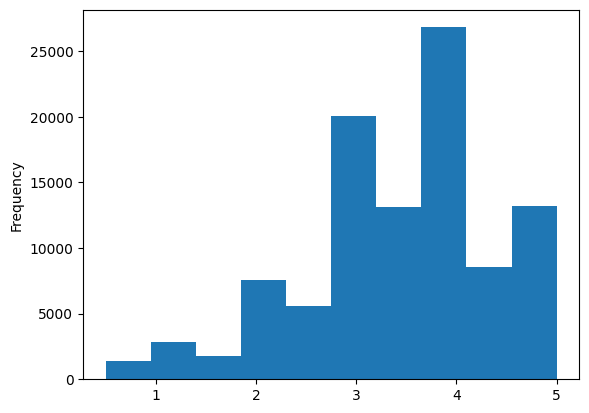

In [7]:
dados.nota.plot(kind='hist')

In [8]:
dados.nota.median()

3.5

In [9]:
mediana = dados.nota.median()
media = dados.nota.mean()

print(f"Mediana: {mediana}")
print(f"Media: {media}")

Mediana: 3.5
Media: 3.501556983616962


In [10]:
dados.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [11]:
import seaborn as sns

<Axes: xlabel='nota'>

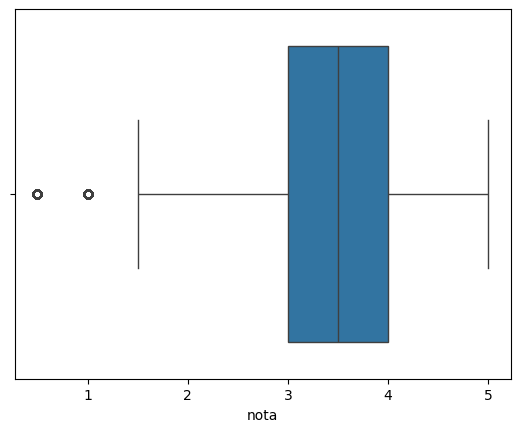

In [12]:
sns.boxplot(dados.nota, orient='h')

Q1 - Q3 representa metade dos dados as linhas representam os outros 25%

#Explorando os dados

In [13]:
filmes =  pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
filmes.columns=['filmeId', 'titulo','genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
dados.query('filmeId==1')['nota'].mean()

3.9209302325581397

In [16]:
medias_por_filme= dados.groupby("filmeId")['nota'].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

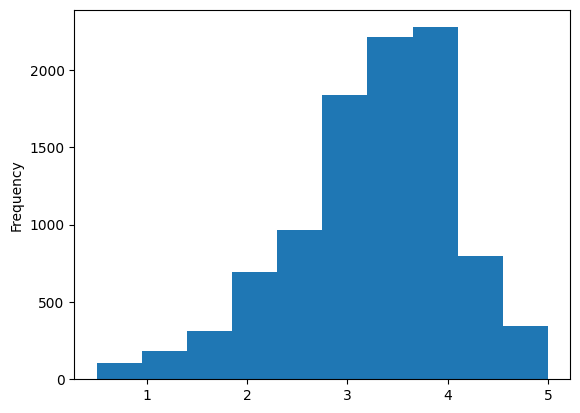

In [17]:
medias_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

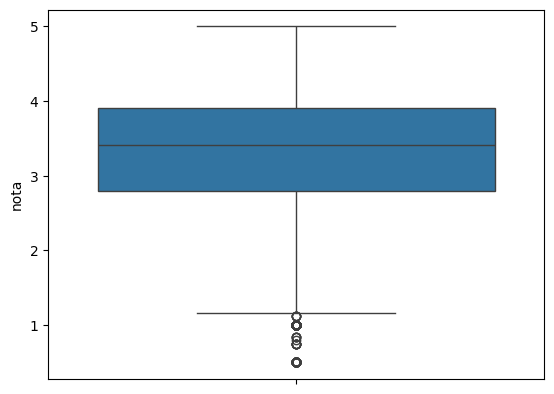

In [18]:
sns.boxplot(medias_por_filme)

In [19]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Text(0.5, 1.0, 'Histograma das médias dos filmes')

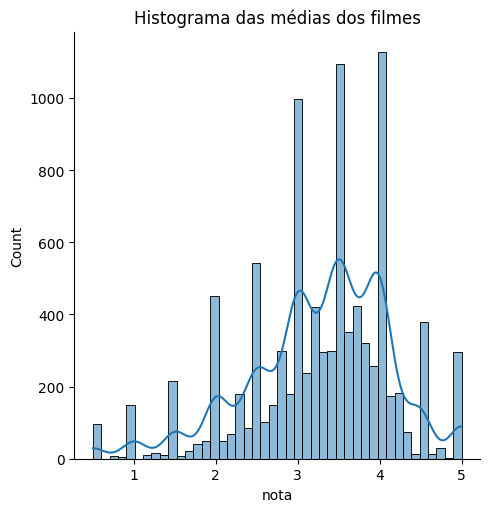

In [20]:
import matplotlib.pyplot as plt
sns.displot(medias_por_filme, kde= True)
plt.title("Histograma das médias dos filmes")

#TMDB informações de filmes
Kaggle
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [21]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


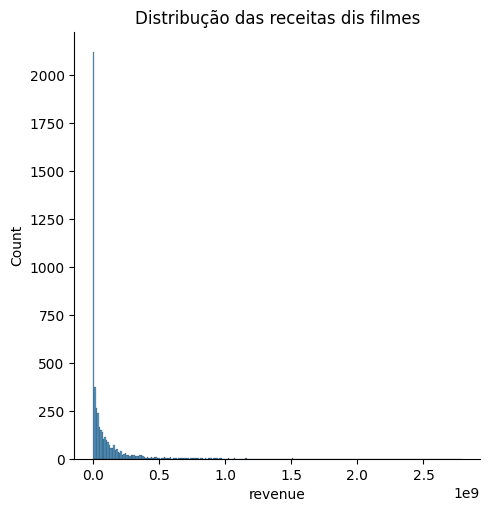

In [22]:
sns.displot(tmdb.revenue)
plt.title("Distribução das receitas dis filmes")
plt.show()

In [23]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [24]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


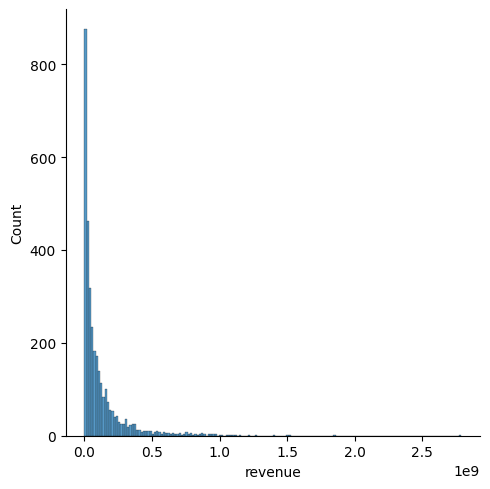

In [25]:
com_faturamento = tmdb.query('revenue > 0')
sns.displot(com_faturamento.revenue)

In [26]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [27]:
tmdb.original_language.value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

Lingua => categorica sem ordem

nota do movie lens =  categoria com ordem

budget => quantitativa continua

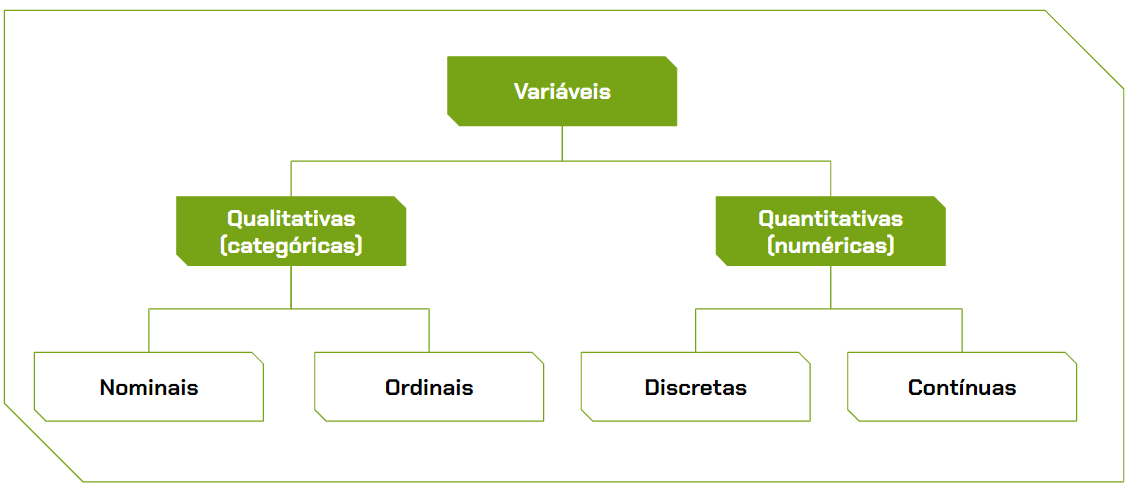

##Variáveis Qualitativas
Também conhecidas como categóricas, representam características que não podem ser medidas numericamente, mas podem ser categorizadas, ou seja, representam uma classificação. Estas variáveis podem ser nominais ou ordinais.

Observação: a depender dos tipos dos dados, é possível que uma variável qualitativa possa ser representada por números. Por exemplo, uma coluna que representa uma característica em que 0 simboliza “Não” e 1 simboliza “Sim”. Os números aqui servem para resumir a representação dos dados e não devem ser utilizados para cálculo, por exemplo, de média.

###Nominal
Uma variável qualitativa nominal é aquela que classifica os elementos em classes ou categorias em relação ao tipo do dado representado. Ela não possui uma relação de grandeza ou ordem dos dados

Exemplos: Nome de produtos, departamentos, métodos de pagamento ou variáveis geográficas, como, cidade, estado e região.

###Ordinal
Uma variável qualitativa ordinal também é aquela que classifica os elementos em classes ou categorias, porém existe uma ordem natural ou hierárquica entre as categorias.

Exemplos: grau de escolaridade (ensino infantil, ensino fundamental, ensino médio), nível de satisfação do cliente (insatisfeito, neutro e satisfeito) e nível socioeconômico.

##Variáveis Quantitativas
Representam medidas numéricas ou quantidades observáveis que podem ser expressas em números. Elas são resultantes de contagens (conjunto finito de valores) ou mensurações (conjunto infinito de valores). Estas variáveis podem ser discretas ou contínuas.

###Discreta
Uma variável quantitativa discreta é aquela que apresenta valores que podem ser contados e geralmente inteiros. Exemplos: quantidade de produto vendido, número de cômodos em uma casa e idade.

###Contínua
Uma variável quantitativa contínua é aquela que apresenta valores que podem assumir qualquer valor dentro de um intervalo específico e geralmente são expressos como números reais.

Exemplos: peso de um produto, altura de uma pessoa, tempo e temperatura de um experimento.



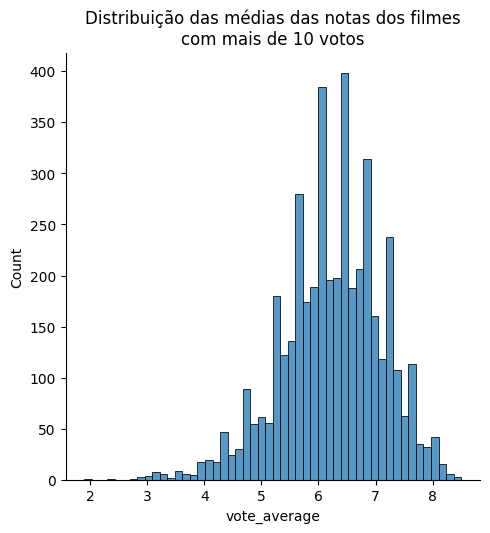

In [28]:
mais_de_10_votos = tmdb.query("vote_count > 10")
sns.displot(mais_de_10_votos["vote_average"])
plt.title("Distribuição das médias das notas dos filmes\ncom mais de 10 votos")
plt.show()

##Visualizando Graficos por categorias

In [29]:
contagem_lingua = tmdb.original_language.value_counts()
contagem_lingua= contagem_lingua.to_frame().reset_index()

In [30]:
contagem_lingua.columns = ["original_language","total"]
contagem_lingua

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


<Axes: xlabel='original_language', ylabel='total'>

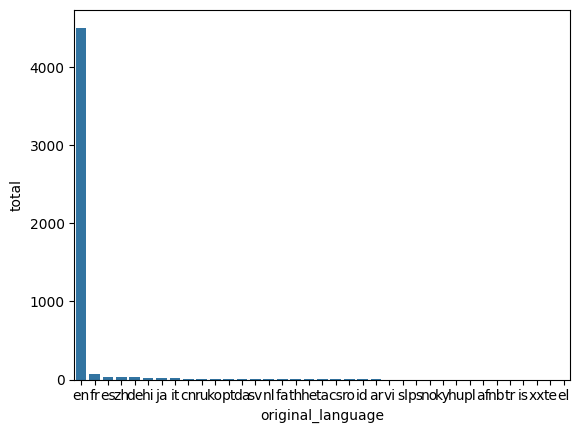

In [31]:
sns.barplot(x='original_language', y='total', data= contagem_lingua)

<Axes: xlabel='original_language', ylabel='count'>

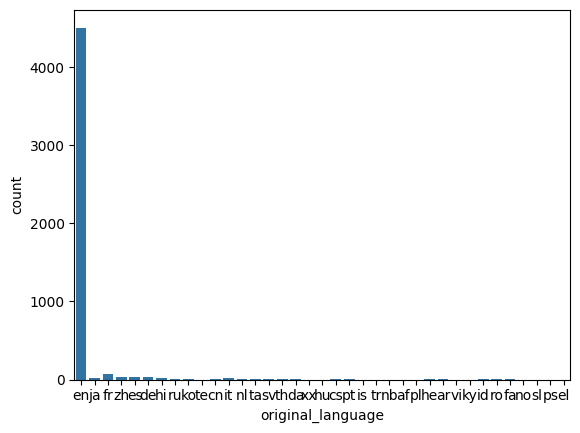

In [32]:
sns.countplot(x='original_language', data= tmdb.original_language.to_frame())

<Axes: ylabel='total'>

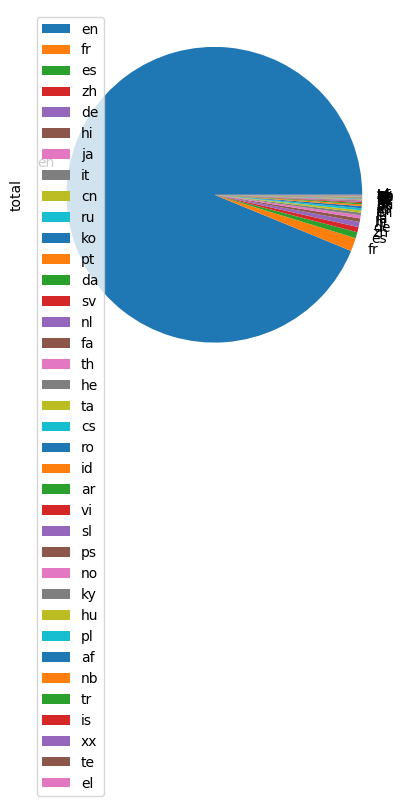

In [33]:
#terror para ler
contagem_lingua.plot(kind='pie', y= "total", labels=contagem_lingua.original_language)

### separando dados de filmes em ingles

In [34]:
total_por_lingua = tmdb["original_language"].value_counts()
total_de_ingles = total_por_lingua.loc["en"]
total_de_ingles


4505

In [35]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles

In [36]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [37]:
dados_lingua = {
  "lingua" : ["ingles", "outros"],
  "total" : [total_de_ingles, total_do_resto]
}
dados_lingua=pd.DataFrame(dados_lingua)
dados_lingua

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

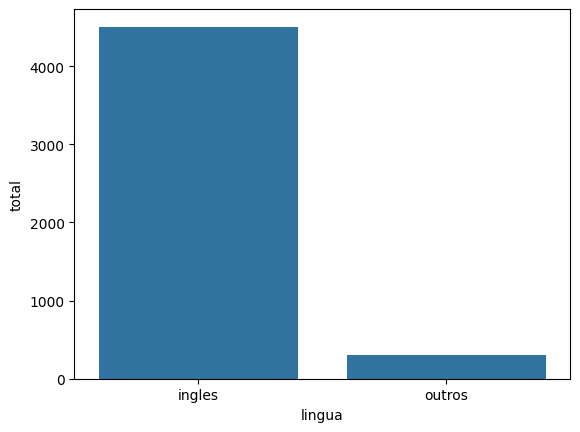

In [38]:
sns.barplot(data=dados_lingua, x="lingua", y="total")

<Axes: ylabel='total'>

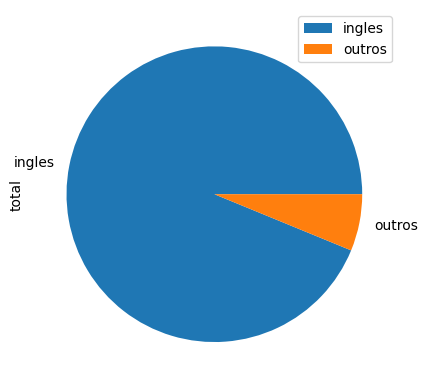

In [39]:
dados_lingua.plot(kind="pie", y="total", labels=dados_lingua["lingua"])

In [48]:
contagem_lingua_outros = tmdb.query("original_language !='en'").original_language.value_counts()
contagem_lingua_outros

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

<Axes: xlabel='original_language', ylabel='count'>

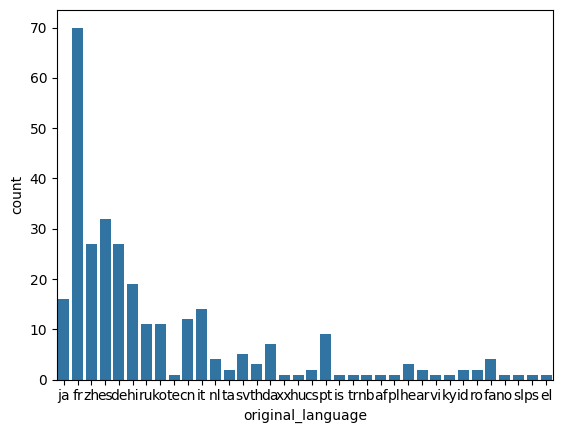

In [41]:
sns.countplot(data = tmdb.query("original_language !='en'"), x='original_language')

([<matplotlib.patches.Wedge at 0x7b9a65c4d780>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

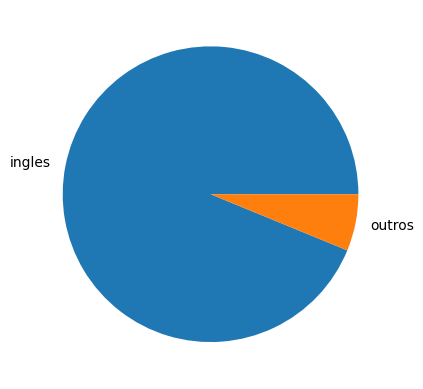

In [42]:
plt.pie(data = dados_lingua,x='total', labels = dados_lingua['lingua'])

In [52]:
sns.color_palette ("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

<Axes: xlabel='original_language', ylabel='percent'>

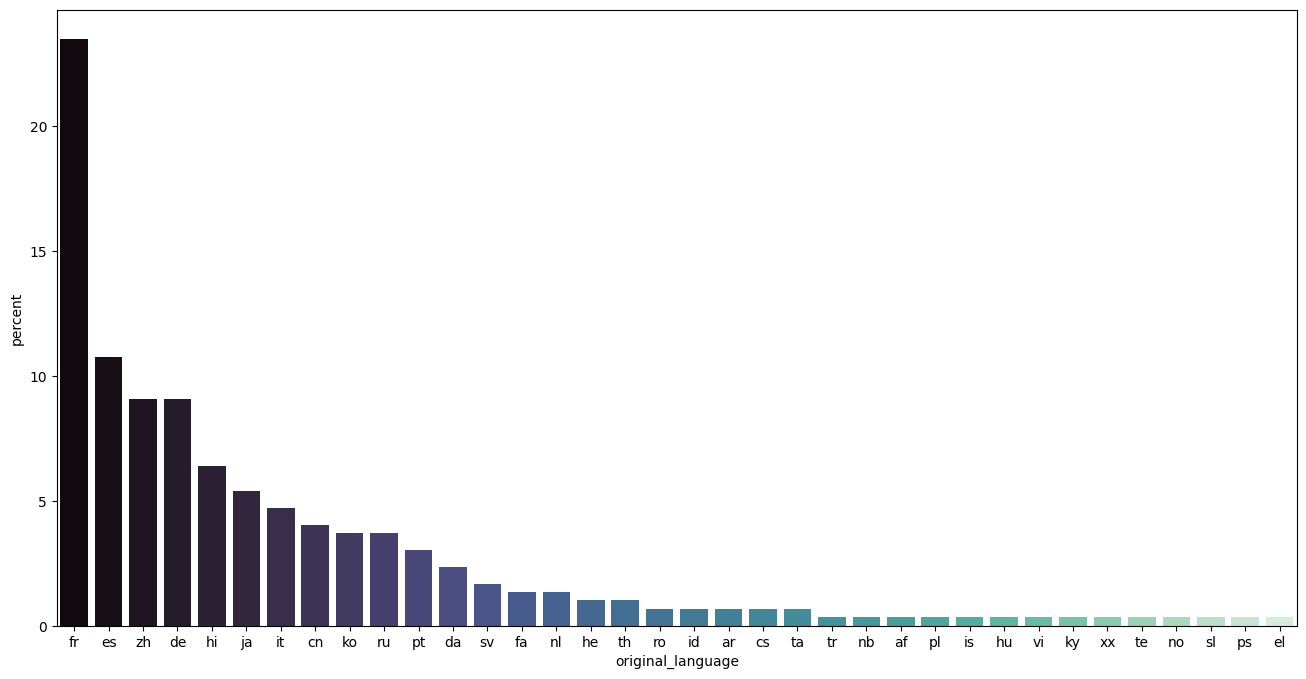

In [58]:
plt.figure(figsize=(16, 8))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order = contagem_lingua_outros.to_frame().index,
              hue="original_language",
               palette="mako",
              hue_order= contagem_lingua_outros.to_frame().index,
              stat="percent",
              x="original_language")

In [59]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [61]:
# prompt: extraia as notas dos dois filmes em variáveis distintas

filme1_nota = dados.query("filmeId==1") ["nota"].mean()
filme2_nota = dados.query("filmeId==2")["nota"].mean()

In [66]:
# prompt: extraia as notas dos dois filmes em variáveis distintas

notas_do_toy_story  = dados.query("filmeId==1")["nota"]
notas_do_jumanji  = dados.query("filmeId==2")["nota"]
media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()
print(media_do_toy_story, media_do_jumanji)

3.9209302325581397 3.4318181818181817


In [67]:
import numpy as np

filme1 = [2.5] * 10 + [3.5] * 10
np.mean (filme1)

3.0

In [68]:
filme2 = [5] * 10 + [1] * 10
np.mean (filme2)

3.0

In [69]:
# prompt: Imprima a média e mediana do filme 1 e filme 2

import numpy as np
print("Filme 1")
print("Média:", np.mean(filme1))
print("Mediana:", np.median(filme1))

print("\nFilme 2")
print("Média:", np.mean(filme2))
print("Mediana:", np.median(filme2))


Filme 1
Média: 3.0
Mediana: 3.0

Filme 2
Média: 3.0
Mediana: 3.0


In [72]:
filme0 = [3.0]* 20 #espalha 0
np.mean (filme0)

3.0

In [73]:
np.std(filme0), np.std(filme1), np.std(filme2)

(0.0, 0.5, 2.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9a6c53b3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9a64156350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9a6c538f70>,
 'medians': [<matplotlib.lines.Line2D at 0x7b9a6412f7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b9a6c53b430>,
 'means': []}

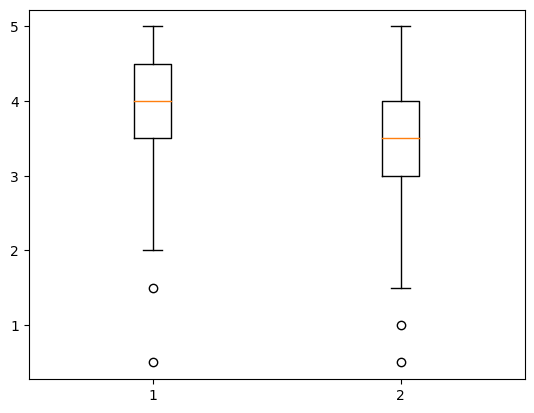

In [74]:
plt.boxplot([notas_do_toy_story,notas_do_jumanji])

<Axes: xlabel='filmeId', ylabel='nota'>

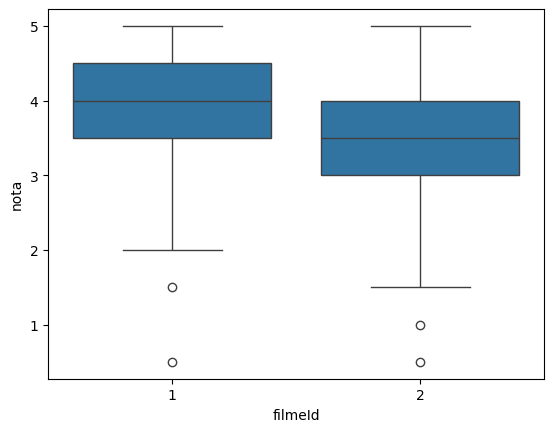

In [75]:
sns.boxplot(data=dados.query("filmeId in [1,2]"),
            x="filmeId",
            y="nota")


<ipython-input-77-19cb1bf8599c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados.query("filmeId in [1,2,3,4,5]"),


<Axes: xlabel='filmeId', ylabel='nota'>

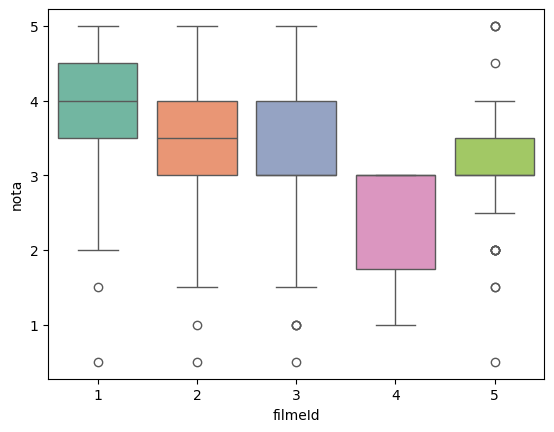

In [77]:
# prompt: mesmo gráfico mas colorido

sns.boxplot(data=dados.query("filmeId in [1,2,3,4,5]"),
            x="filmeId",
            y="nota",
            palette= "Set2")


In [78]:
dados.groupby("filmeId").count()

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [79]:
dados.groupby("filmeId").count().query("nota == 1")

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
